In [36]:
# import thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
# đọc dữ liệu từ file excel
df = pd.read_excel('house_price_dống-da.xlsx')
df.head()

d:\Python\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long
0,Bán nhà Trần Quang Diệu mới coong đẹp 50m2x6 t...,"Đường Trần Quang Diệu, Phường Trung Liệt, Đốn...",50.0,14700.0,2021-01-01,Sổ đỏ,NaN,NaN,4.0,6.0,6.0,Bán nhà riêng\n,Đường Trần Quang Diệu,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.015698,105.824583
1,Bán nhà mặt phố Tây Sơn - 6 tầng. Kinh doanh t...,"Đường Tây Sơn, Phường Trung Liệt, Đống Đa, Hà...",35.0,12500.0,2021-02-19,Sổ đỏ,NaN,NaN,NaN,NaN,6.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.008930,105.824105
2,Bán nhà số 36 Đoàn Kết - phố Khâm Thiên - Đống...,"Số 36 Đoàn Kết, Phố Khâm Thiên, Phường Thổ Qu...",57.0,4200.0,2021-03-10,Sổ đỏ,Nam,Nam,3.0,8.0,4.0,Bán nhà riêng\n,Phố Khâm Thiên,Phường Khâm Thiên,Quận Đống Đa,Thành phố Hà Nội,21.025208,105.833111
3,Bán nhà 6 tầng mới kinh doanh mặt ngõ 1194 Đườ...,"Ngõ 1194, Đường Láng, Phường Láng Thượng, Đố...",62.0,11000.0,2021-03-13,Sổ đỏ,Đông,Đông-Nam,6.0,5.0,6.0,Bán nhà riêng\n,Đường Láng Thượng,Phường Láng Thượng,Quận Đống Đa,Thành phố Hà Nội,21.025379,105.801011
4,"Bán nhà mặt phố Thái Hà 70m2, 5 tầng, 4.5m mặt...","Phố Thái Hà, Phường Trung Liệt, Đống Đa, Hà Nội",70.0,36000.0,2021-03-13,Sổ đỏ,NaN,NaN,NaN,6.0,5.0,Bán nhà mặt phố\n,Phố Trung Liệt,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.009239,105.824230


#### Phân tích mối liên hệ giữa diện tích với giá nhà. Đồng thời, giữa số phòng ngủ với giá nhà và giữa số toilet với giá nhà.

In [38]:
df.columns

Index(['title', 'address', 'area', 'price', 'postDate', 'land_certificate',
       'house_direction', 'balcony_direction', 'toilet', 'bedroom', 'floor',
       'type_of_land', 'street_name', 'ward_name', 'district_name',
       'city_name', 'lat', 'long'],
      dtype='object')

Text(0.5, 1.0, 'Mối liên hệ giữa số toilet và giá nhà')

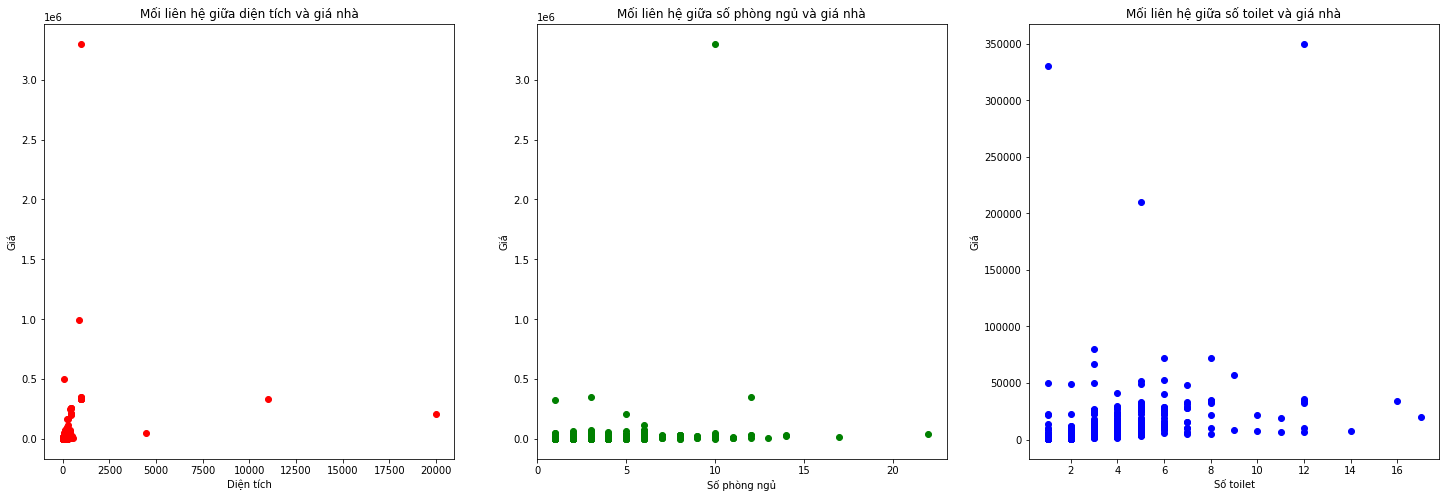

In [39]:
fig, ax = plt.subplots(1,3,figsize=(25, 8))
ax[0].scatter(df['area'], df['price'],c='red')
ax[0].set_xlabel('Diện tích')
ax[0].set_ylabel('Giá')
ax[0].set_title('Mối liên hệ giữa diện tích và giá nhà')

ax[1].scatter(df['bedroom'], df['price'],c='green')
ax[1].set_xlabel('Số phòng ngủ')
ax[1].set_ylabel('Giá')
ax[1].set_title('Mối liên hệ giữa số phòng ngủ và giá nhà')

ax[2].scatter(df['toilet'], df['price'],c='blue')
ax[2].set_xlabel('Số toilet')
ax[2].set_ylabel('Giá')
ax[2].set_title('Mối liên hệ giữa số toilet và giá nhà')

#### So sánh giá nhà trung bình trên 1 m2 giữa các hình thức nhà (type_of_land). Đồng thời thể hiện tỉ lệ % bài đăng (bản ghi) giữa các hình thức nhà (type_of_land).

In [40]:
df['price/m2'] = df['price'] / df['area']
df.head(1)

,title,address,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,type_of_land,street_name,ward_name,district_name,city_name,lat,long,price/m2
0,Bán nhà Trần Quang Diệu mới coong đẹp 50m2x6 t...,"Đường Trần Quang Diệu, Phường Trung Liệt, Đốn...",50.0,14700.0,2021-01-01,Sổ đỏ,NaN,NaN,4.0,6.0,6.0,Bán nhà riêng\n,Đường Trần Quang Diệu,Phường Trung Liệt,Quận Đống Đa,Thành phố Hà Nội,21.015698,105.824583,294.0


In [41]:
df_groupby = df.groupby('type_of_land')['price/m2'].mean()
df_groupby

type_of_land
Bán nhà mặt phố         378.838647
Bán nhà mặt phố\n       358.896592
Bán nhà riêng                  inf
Bán nhà riêng\n         171.494858
Bất động sản khác              inf
Bất động sản khác\n     236.683993
Chung cư                 26.826948
Tập thể, cư xá           33.353309
Đất thổ cư              133.153612
Name: price/m2, dtype: float64

In [42]:
df_percent = df['type_of_land'].value_counts()
df_percent = pd.DataFrame(df_percent)
df_percent

,type_of_land
Bán nhà riêng,348
Bán nhà riêng\n,254
Bán nhà mặt phố\n,176
"Tập thể, cư xá",69
Bán nhà mặt phố,65
Chung cư,59
Bất động sản khác,11
Bất động sản khác\n,10
Đất thổ cư,8


In [43]:
df_percent.reset_index(inplace=True)
df_percent

,index,type_of_land
0,Bán nhà riêng,348
1,Bán nhà riêng\n,254
2,Bán nhà mặt phố\n,176
3,"Tập thể, cư xá",69
4,Bán nhà mặt phố,65
5,Chung cư,59
6,Bất động sản khác,11
7,Bất động sản khác\n,10
8,Đất thổ cư,8


In [44]:
df_percent.rename(columns={'type_of_land': 'values'}, inplace=True)
df_percent.rename(columns={'index': 'type_of_land'}, inplace=True)
df_percent

,type_of_land,values
0,Bán nhà riêng,348
1,Bán nhà riêng\n,254
2,Bán nhà mặt phố\n,176
3,"Tập thể, cư xá",69
4,Bán nhà mặt phố,65
5,Chung cư,59
6,Bất động sản khác,11
7,Bất động sản khác\n,10
8,Đất thổ cư,8


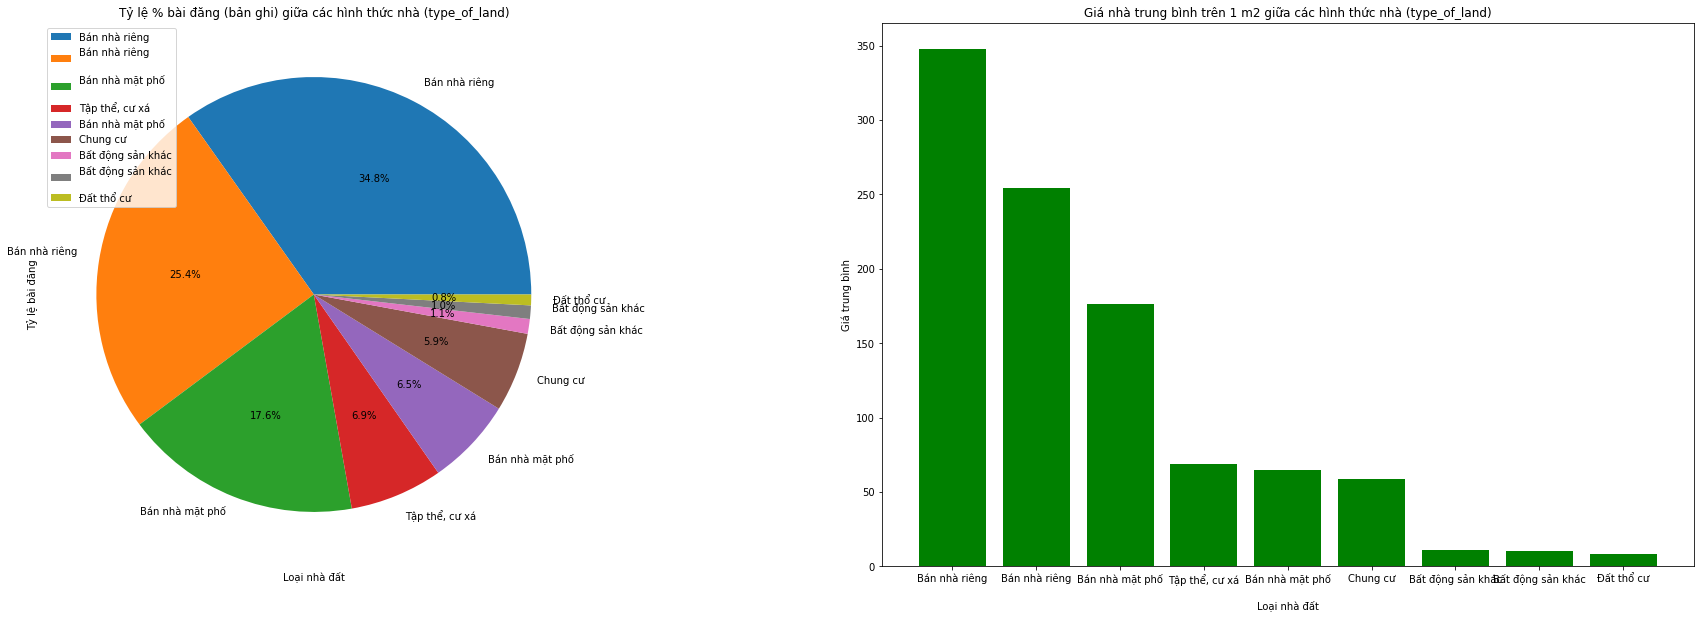

In [51]:
fig, ax = plt.subplots(1,2,figsize=(32, 10))
ax[0].pie(df_percent['values'], labels=df_percent['type_of_land'], autopct='%1.1f%%')
ax[0].set_xlabel('Loại nhà đất')
ax[0].set_ylabel('Tỷ lệ bài đăng')
ax[0].set_title('Tỷ lệ % bài đăng (bản ghi) giữa các hình thức nhà (type_of_land)')
ax[0].legend(loc='upper left')

ax[1].bar(df_percent['type_of_land'], df_percent['values'], color='green')
ax[1].set_xlabel('Loại nhà đất')
ax[1].set_ylabel('Giá trung bình')
ax[1].set_title('Giá nhà trung bình trên 1 m2 giữa các hình thức nhà (type_of_land)');


#### Vẽ biểu đồ thể hiện sự thay đổi giá nhà trung bình trên 1m2 theo số lượng phòng ngủ, theo số phòng toilet hoặc theo diện tích

In [52]:
df_bedroom = df.groupby('bedroom')['price/m2'].mean()
df_toilet = df.groupby('toilet')['price/m2'].mean()
df_area = df.groupby('area')['price/m2'].mean()

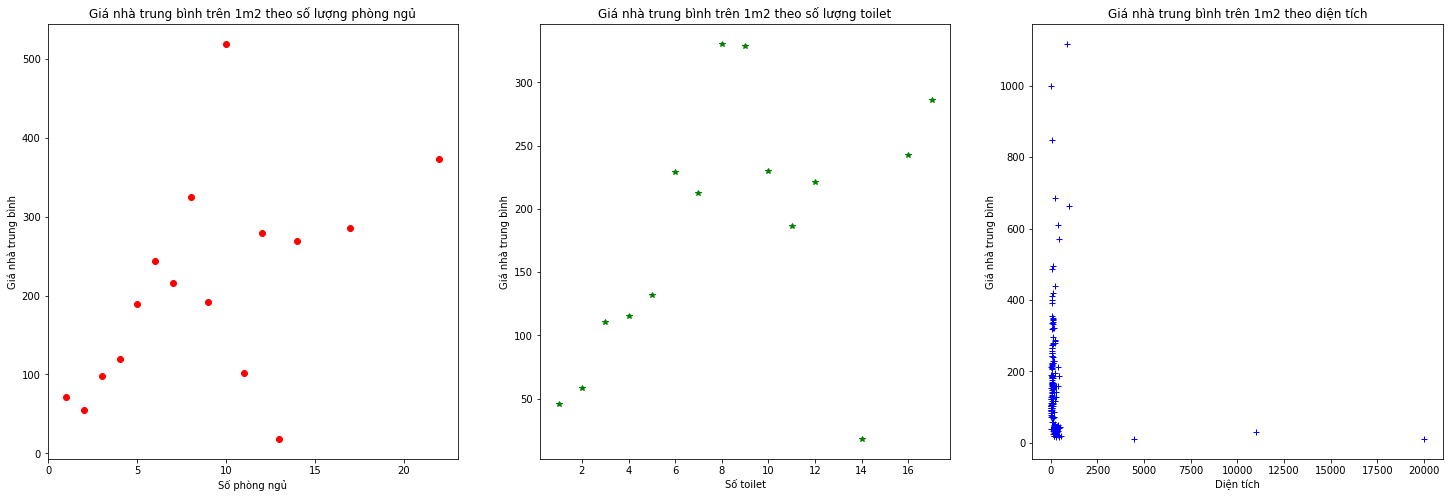

In [57]:
fig, ax = plt.subplots(1,3,figsize=(25, 8))
ax[0].plot(df_bedroom.index, df_bedroom, 'o', color='red')
ax[0].set_xlabel('Số phòng ngủ')
ax[0].set_ylabel('Giá nhà trung bình')
ax[0].set_title('Giá nhà trung bình trên 1m2 theo số lượng phòng ngủ')

ax[1].plot(df_toilet.index, df_toilet, '*', color='green')
ax[1].set_xlabel('Số toilet')
ax[1].set_ylabel('Giá nhà trung bình')
ax[1].set_title('Giá nhà trung bình trên 1m2 theo số lượng toilet')

ax[2].plot(df_area.index, df_area, '+', color='blue')
ax[2].set_xlabel('Diện tích')
ax[2].set_ylabel('Giá nhà trung bình')
ax[2].set_title('Giá nhà trung bình trên 1m2 theo diện tích');